In [1]:
import numpy as np
import scipy.stats as stats  
import pandas as pd

## One Sample Test

In [2]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

#### <font color=blue> a. Right Tail test </font>

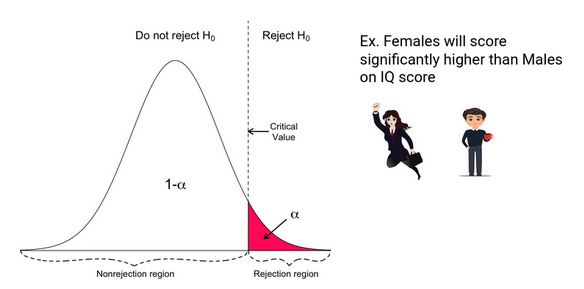

**Question:**


A cartwheeling competition was organized for some adults. The data looks like following,

(80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01)

Is the average cartwheel distance (in inches) for adults more than 80 inches?

+ **Null Hypothesis:** $\mu$ = 80
+ **Alternative Hypthosis:** $\mu$ > 80

In [3]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

+ alternative : {'two-sided', 'less', 'greater'}, optional
+ default - two-sided

In [4]:
tscore, pvalue = ttest_1samp(cwdata, popmean=80, alternative='greater')
tscore, pvalue

(1.756973189172546, 0.045837428494522534)

#### <font color=blue> b. Two Tail test </font>

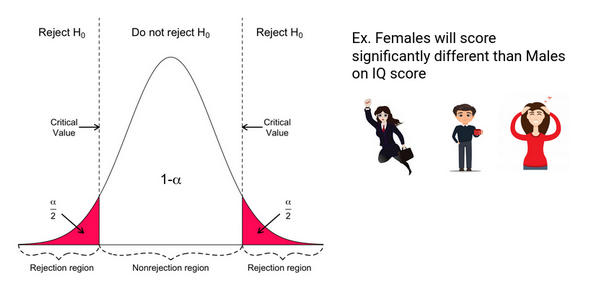

**Question:**
    
You want to test an American citizen's claim that the average height of an American is 175.3 cm. Measure the heights of ten American males  and use the T-test to determine if the American’s claim is true.

+ **Null Hypothesis:** $\mu_1$ = 175 
+ **Alternative Hypthosis:** $\mu_1 \neq$ 175 

In [5]:
# 1-sample t-test
one_sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
t_stat, pval = ttest_1samp(one_sample_data, 175.3,alternative='two-sided')

print ("The t-statistic is ", t_stat," and the p-value is ",pval)

The t-statistic is  2.295568968083183  and the p-value is  0.04734137339747034


#### <font color=blue> c. Proportions </font>

**Question**

In previous years, 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media?

In [6]:
import statsmodels.api as sm

In [7]:
n = 1018
pnull = .52
phat = .56

In [8]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

## Two Sample test

#### <font color=blue> a. Independent Samples </font>

**Question**

Considering adults in the NHANES data, do males have a significantly different from the mean Body Mass Index of females?

+ **Null Hypothesis:** $\mu_1 = \mu_2$
+ **Alternative Hypthosis:** $\mu_1 \neq \mu_2$

In [9]:
bmi_data = pd.read_csv('bmi_data.csv')
bmi_data

,GENDER,BMI
0,1,27.8
1,1,30.8
2,1,28.8
3,2,42.4
4,2,20.3
...,...,...
5730,2,21.5
5731,1,33.8
5732,2,31.0
5733,1,26.0


In [10]:
females = bmi_data[bmi_data["GENDER"] == 2]
males = bmi_data[bmi_data["GENDER"] == 1]

In [25]:
ttest_ind(females["BMI"].dropna(), males["BMI"].dropna(), alternative='two-sided')

Ttest_indResult(statistic=6.1755933531383205, pvalue=7.050275578094527e-10)

#### <font color=blue> b. Paired Samples </font>

**Question**

The marks of a set of students before and after tutoring is provided. Is there a significant difference in their performance?

In [12]:
before_tutoring =  [197,195,191,174,236,226,157,196, 201, 196,181, 164, 181,229,231]
after_tutoring = [210,205,193,182,259,239,164,197, 222, 211,187, 175, 186,243,246]
sum(before_tutoring) , sum(after_tutoring)

(2955, 3119)

In [13]:
ttest_rel(before_tutoring, after_tutoring, alternative='two-sided')

Ttest_relResult(statistic=-6.6896995348736334, pvalue=1.0275656281485408e-05)

#### <font color=blue> c. Proportions </font>

**Research Question**

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?
**Data:** 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons.
308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.

+ **Null Hypothesis:** p1 - p2 = 0
+ **Alternative Hypthosis:** p1 - p2 $\neq$ = 0

In [14]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

In [15]:
sample_success_a, sample_size_a = (.37*247, 247)
sample_success_b, sample_size_b = (0.39*308, 308)

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

In [16]:
stat, p_value = sm.stats.proportions_ztest(count=successes, nobs=samples, alternative='two-sided')
stat, p_value

(-0.4821451700126961, 0.6297028238097944)

## More than 2 Samples

### ANOVA

In [17]:
df = pd.read_csv('diet.csv')
df

,Atkins,GM,South Beach
0,6,4,6
1,2,4,7
2,3,5,5
3,4,7,6
4,2,8,8
5,3,5,7
6,3,3,8
7,2,7,9
8,7,10,6
9,8,4,5


In [18]:
stats.f_oneway(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2])

F_onewayResult(statistic=3.5714285714285716, pvalue=0.039440588798258305)

## Chi Square Test

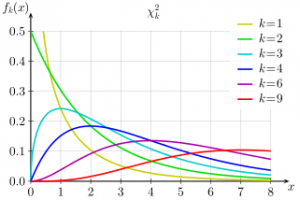

#### Chi Square - Goodness of Fit

A shop owner claims that an equal number of customers come into his shop each weekday. To test this hypothesis, a researcher records the number of customers that come into the shop in a given week and finds the following:

+ Monday: 50 customers
+ Tuesday: 60 customers
+ Wednesday: 40 customers
+ Thursday: 47 customers
+ Friday: 53 customers

+ **Null Hypothesis** There is no significant difference between the observed and the expected values.

+ **Alternate Hypothesis** There is a significant difference between the observed and the expected values.

In [19]:
expected = [50, 50, 50, 50, 50]
observed = [50, 60, 40, 47, 53]

In [20]:
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=4.359999999999999, pvalue=0.3594720674366307)

#### Chi Square - Test of independence

Does interest in a specific subject depend on gender

       Science,	Math,	Art
    Male         20,      30,    15

    Female       20,      15,    30

+ **Null Hypothesis** There is no significant relationship between gender and interest in a specific subject.

+ **Alternate Hypothesis** There is a significant relationship between gender and interest in a specific subject.

In [21]:
# contingency table
table = [[10, 20, 30],
[6,  9,  17]]
print(table)

[[10, 20, 30], [6, 9, 17]]


In [22]:
stat, p, dof, expected = stats.chi2_contingency(table)
print('dof=%d' % dof)
print(p)

dof=2
0.873028283380073


In [23]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

significance=0.050, p=0.873
Independent
